# Inverse Problems Exercises: 2022s s04 (all)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): 

Maximilian Richter

## D02: Tikhonov approach

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_gaussian = 'file_gaussian.npz'
with np.load(file_gaussian) as data:
    f_true = data['f_true']
    A_psf = data['A_psf']
    list_gn = data['list_gn']

### Imaging model
The imaging model can be represented by
$$
g = h \otimes f_\text{true}
= Af_\text{true}
= \mathcal{F}^{-1}\{ \mathcal{F}\{h\} \mathcal{F}\{f_\text{true}\} \},
$$
$$
g' = g + \epsilon.
$$
* $f_\text{true}$ is the input signal
* $h$ is the point spread function (kernel)
* $\otimes$ is the convolution operator
* $A$ is the Toeplitz matrix of $h$
* $\mathcal{F}$ and $\mathcal{F}^{-1}$ are the Fourier transform operator and inverse Fourier transform operator
* $\epsilon$ is the additive Gaussian noise
* $g$ is the filtered signal
* $g'$ is the noisy signal

### Mean squared error
Implement the mean squared error (MSE)
$$
\operatorname{MSE}(f)=\frac{1}{n}\sum_{i=1}^n(f_i - f_{\text{true}i})^2
$$
* Given the input signal $f$
* Given the true signal $f_\text{true}$
* Implement the function `mean_squared_error()` (using `numpy.array`)

In [3]:
def mean_squared_error(f, f_true):
    """ Compute the mean squared error comparing to the true signal:

    :param f: Input signal.
    :param f_true: True signal.
    :returns: Mean squared error.
    """
    return np.mean((f - f_true)**2)

In [4]:
# This cell contains hidden tests.


### Difference matrix
Implement the difference matrix $D_\text{diff}$
$$D_\text{diff} = \begin{bmatrix} 
1 & 0 & 0 & 0 & ... & 0 & -1 \\
-1 & 1 & 0 & 0 & ... & 0 & 0 \\
0 & -1 & 1 & 0 & ... & 0 & 0 \\
  &   &   & ... &   &   & \\
0 & 0 & 0 & 0 & ... & -1 & 1 \end{bmatrix}$$
* Given the size $n_\text{diff}$
* Implement the function `get_diff_matrix()` (using `numpy.array`)

Calculate the difference matrix
* Return the outputs of with the size of $10$, $50$, $100$, respectively
* Save the outputs in the variable `list_D_diff` (as `list` of `numpy.array`)

Display the result
* Plot the matrices in `list_D_diff` as grayscale images in the same order of the parameter options in the subplots of `axs`
* Show the colorbar of each subplot
* Add proper titles to the subplots of `axs`

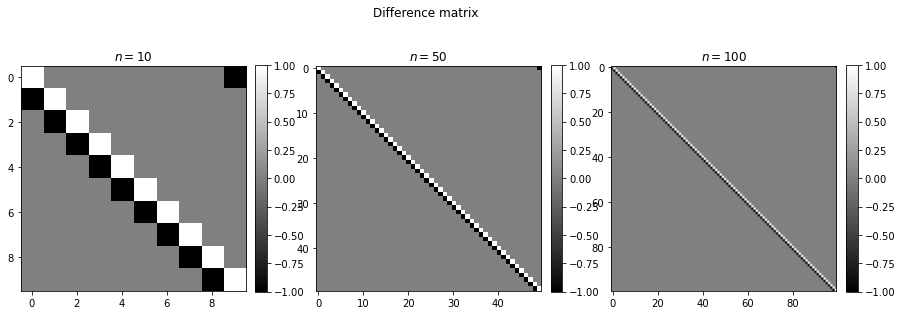

In [5]:
def get_diff_matrix(n):
    """ Compute a matrix to calculate the difference along a vector of the size n
    between two neighboring elements.

    :param n: Size of the target vector.
    :returns: Matrix with shape (n, n), which calculates the difference.
    """
    diff_matrix = np.eye(n)
    diff_matrix[1:,:-1] += np.eye(n-1)*-1
    diff_matrix[0,n-1] = -1
    return diff_matrix

sizes = [10, 50, 100]
list_D_diff = [get_diff_matrix(n) for n in sizes]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Difference matrix')

for i in range(3):
    im = axs[i].imshow(list_D_diff[i], cmap="gray")
    axs[i].set_title("$n =${}".format(sizes[i]))
    plt.colorbar(im, ax=axs[i],fraction=0.046, pad=0.04)

In [6]:
# This cell contains hidden tests.


In [7]:
# This cell contains hidden tests.


### Tikhonov regularization
Implement the objective function with Tikhonov regularization is
$$
L(f) = \|Af - g'\|_2^2 + \lambda\|D'f\|_2^2
$$
* Given the input signal $f$
* Given the system matrix $A$
* Given the measurement $g'$
* Given the regularization matrix $D'$
* Given the regularization parameter $\lambda$
* Implement the function `objective_tikhonov()` (using `numpy.array`)

Implement the closed form solution of the regularized objective function
$$
\tilde f = (A^T A + \lambda D'^T D')^{-1} A^T g' = A_\lambda^{PI} g'
$$
* Given the system matrix $A$
* Given the measurement $g'$
* Given the regularization matrix $D'$
* Given the regularization parameter $\lambda$
* Implement the function `solution_tikhonov()` (using `numpy.array`)

In [8]:
def objective_tikhonov(f, A, g, D, lb):
    """ Compute the objective function with Tikhonov regularization.
    
    :param f: Current estimate of the signal.
    :param A: 2D matrix of the linear problem.
    :param g: Observed signal.
    :param D: 2D matrix in the regularization term.
    :param lb: Regularization parameter.
    :returns: Objective function value.
    """
    return np.sum((A@f - g)**2) + lb * np.sum((D@f)**2)


def solution_tikhonov(A, g, D, lb):
    """ Compute the estimate of the true signal with Tikhonov regularization.

    Use a regularization term to suppress noise.

    :param A: 2d matrix A of the linear problem.
    :param g: Observed signal.
    :param D: 2D matrix in the regularization term.
    :param lb: Regularization parameter.
    :returns: Estimate of the true signal.
    """
    return np.linalg.inv(A.T @ A + lb * D.T @ D) @ A.T @ g

In [9]:
# This cell contains hidden tests.


In [10]:
# This cell contains hidden tests.


### Best fit solution
The best fit solution is the solution without regularization, i.e. $D' = 0$
* Calculate the closed form solution for the noisy signals in `list_gn`
* Save the outputs in the variable `list_f_est` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_f_est` in the same order of the parameter options in the subplots of `axs`
* Plot the corresponding noisy signal in each subplot
* Plot the input signal `f_true` in each subplot
* Show the legend in each subplot
* Show the case information in the titles to the subplots
* Show the mean squared error of each output comparing to `f_true` in the titles to the subplots
* Show the objective function value of each output in the titles to the subplots

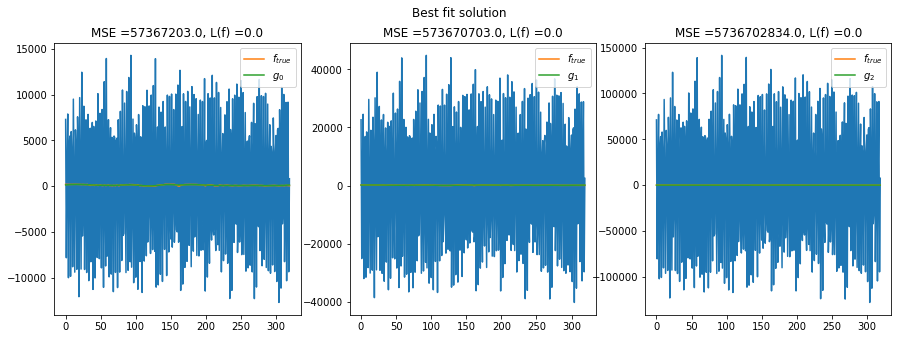

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Best fit solution')

list_f_est = [solution_tikhonov(A_psf, gn, np.zeros(A_psf.shape), 0) for gn in list_gn]

for i in range(3):
    MSE = np.round(mean_squared_error(f_true, list_f_est[i]))
    objective = np.round(objective_tikhonov(list_f_est[i], A_psf, list_gn[i], np.zeros(A_psf.shape), 0))
    axs[i].plot(list_f_est[i])
    axs[i].plot(f_true, label="$f_{true}$")
    axs[i].plot(list_gn[i], label="$g_{}$".format(i))
    axs[i].set_title("MSE ={}, L(f) ={}".format(MSE, objective))
    axs[i].legend()

In [12]:
# This cell contains hidden tests.


### Explain why this solution amplifies the noise

The closed form solution without $D'$ is performed only by inverting the system matrix squared $A^TA$, which has small entries. Without regularization, this inversion results in a matrix with very large entrys. These large values amplify the noise of the signal reconstruction

### Minimal length solution
The minimal length solution is the solution with $D' = I$
* Calculate the closed form solution for the noisy signals in `list_gn`
* Return the outputs with $\lambda$ of $0.1$, $0.01$, $0.001$, respectively 
* Save the outputs in the variable `list_f_est` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_f_est` in the same order of the parameter options in the subplots of `axs`
* Show the cases of the same noisy signal in the same subplot column
* Show the cases with the same $\lambda$ in the same subplot row
* Plot the corresponding noisy signal in each subplot
* Plot the input signal `f_true` in each subplot
* Show the legend in each subplot
* Show the case information in the titles to the subplots
* Show the mean squared error of each output comparing to `f_true` in the titles to the subplots
* Show the objective function value of each output in the titles to the subplots

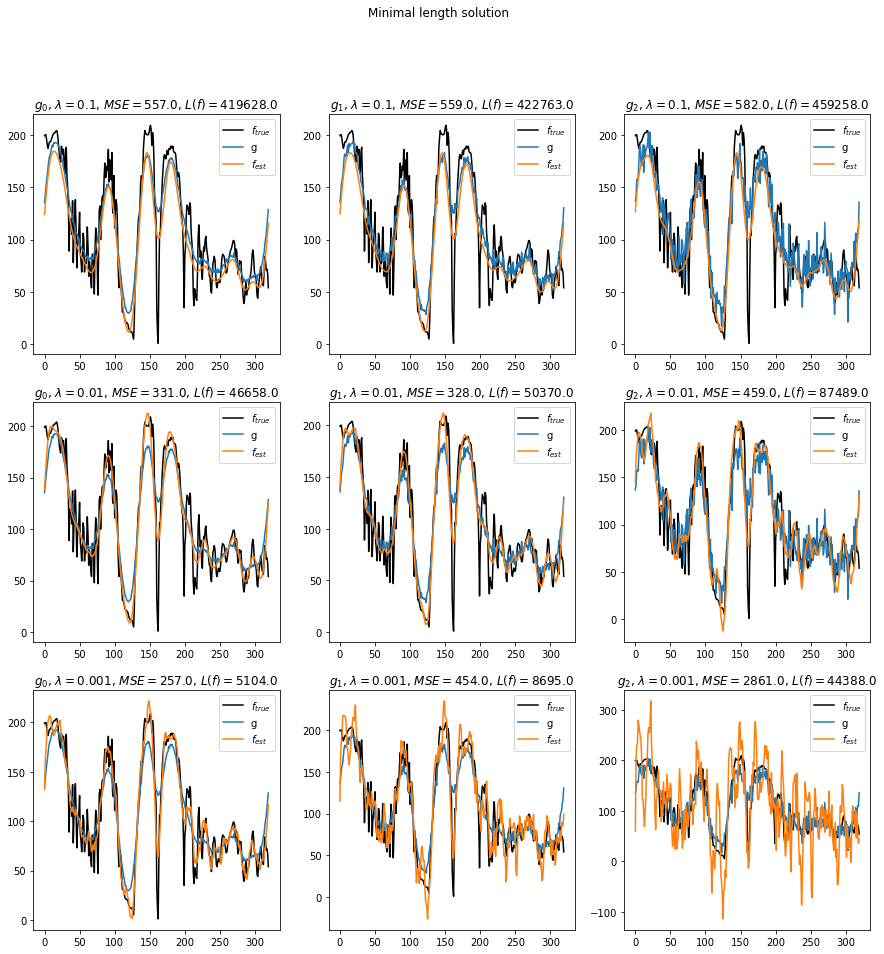

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Minimal length solution')

lbs = [0.1, 0.01, 0.001]
list_f_est = []

for i in range(3):
    for j in range(3):
        f_est = solution_tikhonov(A_psf, list_gn[j], np.eye(A_psf.shape[0]), lbs[i])
        list_f_est.append(f_est)
        MSE = np.round(mean_squared_error(f_est, f_true))
        objective = np.round(objective_tikhonov(f_est, A_psf, list_gn[j], np.eye(A_psf.shape[0]),lbs[i]))
        axs[i,j].plot(f_true, label="$f_{true}$", color="black")
        axs[i,j].plot(list_gn[j], label="g")
        axs[i,j].plot(f_est, label="$f_{est}$")
        axs[i,j].set_title("$g_{}$, $\lambda ={}$, $MSE ={}$, $L(f) ={}$".format(j, lbs[i], MSE, objective))
        axs[i,j].legend()

In [14]:
# This cell contains hidden tests.


### Gradient magnitude solution
The minimal length solution is the solution with $D' = D_\text{diff}$
* Calculate the closed form solution for the noisy signals in `list_gn`
* Return the outputs with $\lambda$ of $0.1$, $0.01$, $0.001$, respectively 
* Save the outputs in the variable `list_f_est` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_f_est` in the same order of the parameter options in the subplots of `axs`
* Show the cases of the same noisy signal in the same subplot column
* Show the cases with the same $\lambda$ in the same subplot row
* Plot the corresponding noisy signal in each subplot
* Plot the input signal `f_true` in each subplot
* Show the legend in each subplot
* Show the case information in the titles to the subplots
* Show the mean squared error of each output comparing to `f_true` in the titles to the subplots
* Show the objective function value of each output in the titles to the subplots

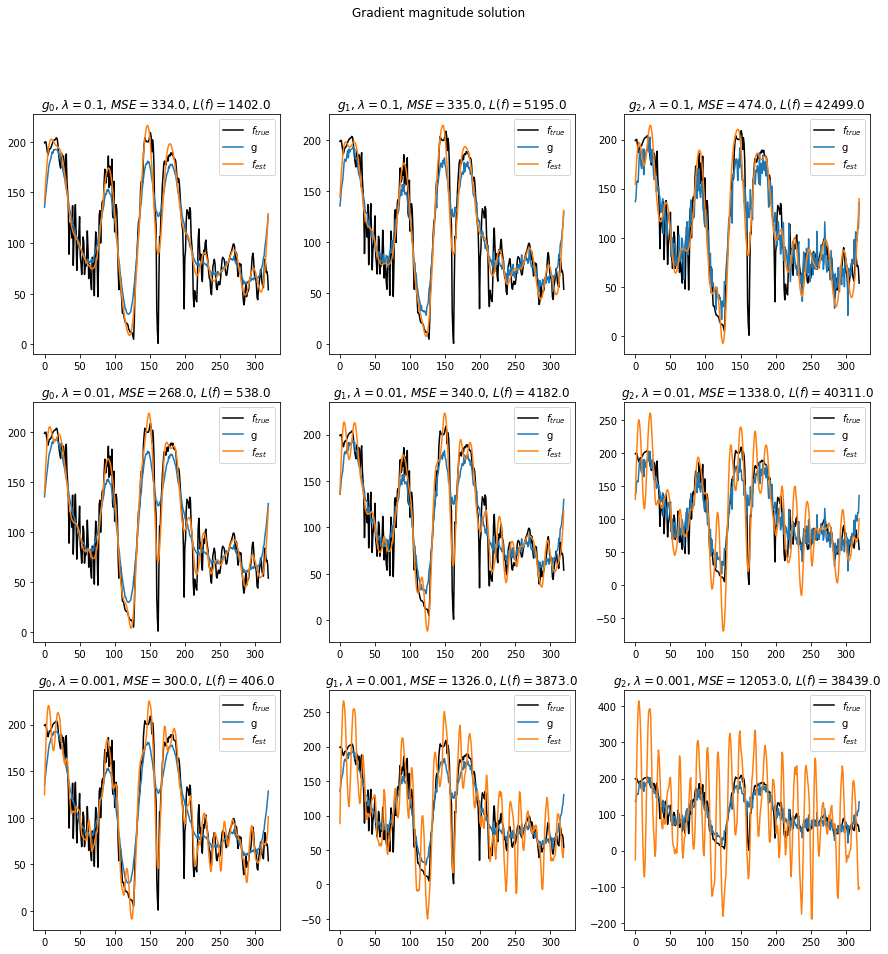

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Gradient magnitude solution')

list_f_est = []

for i in range(3):
    for j in range(3):
        f_est = solution_tikhonov(A_psf, list_gn[j], get_diff_matrix(A_psf.shape[0]), lbs[i])
        list_f_est.append(f_est)
        MSE = np.round(mean_squared_error(f_est, f_true))
        objective = np.round(objective_tikhonov(f_est, A_psf, list_gn[j], get_diff_matrix(A_psf.shape[0]),lbs[i]))
        axs[i,j].plot(f_true, label="$f_{true}$", color="black")
        axs[i,j].plot(list_gn[j], label="g")
        axs[i,j].plot(f_est, label="$f_{est}$")
        axs[i,j].set_title("$g_{}$, $\lambda ={}$, $MSE ={}$, $L(f) ={}$".format(j, lbs[i], MSE, objective))
        axs[i,j].legend()

In [16]:
# This cell contains hidden tests.


### Explain the differences for different regularization matrices and parameters

For the case of the regularization with the identity matrix, the reconstruction already yields a very good score for the MSE, while the objective function is moderate. One can see how the size of the regularization parameter $\lambda$ changes the quality of the reconstruction. The less $\lambda$ the worse is the reconstruction for all cases of different strength of signal noise. This is due to the same reason as the amplification of the noise in the non-regularized case above. 

On the other hand, the regularization with the difference matrix $D'$ yields better results for the objective function while the mean squared difference is similar to the case with the identity matrix. The identity regularization does also have the lowest MSE of all trials. However, the objective function of the regularization with the difference matrix is considerably smaller, and therefore better as the identity regularization in all cases. As with the other method, difference matrix regularization depends on the size of $\lambda$, where smaller values, hence less regularization, leads to worse reconstruction. 